## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 5s 28ms/step - loss: 2.2941 - accuracy: 0.1395 - val_loss: 2.2403 - val_accuracy: 0.1820
Epoch 2/500
196/196 [==============================] - 5s 27ms/step - loss: 2.2116 - accuracy: 0.2054 - val_loss: 2.1858 - val_accuracy: 0.2258
Epoch 3/500
196/196 [==============================] - 5s 27ms/step - loss: 2.1621 - accuracy: 0.2332 - val_loss: 2.1397 - val_accuracy: 0.2471
Epoch 4/500
196/196 [==============================] - 5s 26ms/step - loss: 2.1165 - accuracy: 0.2516 - val_loss: 2.0959 - val_accuracy: 0.2587
Epoch 5/500
196/196 [==============================] - 7s 38ms/step - loss: 2.0756 - accuracy: 0.2639 - val_loss: 2.0574 - val_accuracy: 0.2753
Epoch 6/500
196/196 [==============================] - 7s 33ms/step - loss: 2.0406 - accuracy: 0.2780 - val_loss: 2.0256 - val_accuracy: 0.2873
Epoch 7/500
196/196 [==============================] - 5s 27ms/step - loss: 2.0111 - accuracy: 0.2889 - val_loss: 1.9981 - val_accuracy:

196/196 [==============================] - 5s 26ms/step - loss: 1.6601 - accuracy: 0.4218 - val_loss: 1.6658 - val_accuracy: 0.4212
Epoch 58/500
196/196 [==============================] - 5s 26ms/step - loss: 1.6567 - accuracy: 0.4235 - val_loss: 1.6640 - val_accuracy: 0.4224
Epoch 59/500
196/196 [==============================] - 5s 25ms/step - loss: 1.6536 - accuracy: 0.4234 - val_loss: 1.6611 - val_accuracy: 0.4236
Epoch 60/500
196/196 [==============================] - 5s 26ms/step - loss: 1.6503 - accuracy: 0.4267 - val_loss: 1.6583 - val_accuracy: 0.4255
Epoch 61/500
196/196 [==============================] - 6s 30ms/step - loss: 1.6473 - accuracy: 0.4268 - val_loss: 1.6576 - val_accuracy: 0.4213
Epoch 62/500
196/196 [==============================] - 5s 25ms/step - loss: 1.6444 - accuracy: 0.4271 - val_loss: 1.6515 - val_accuracy: 0.4249
Epoch 63/500
196/196 [==============================] - 5s 26ms/step - loss: 1.6410 - accuracy: 0.4291 - val_loss: 1.6509 - val_accuracy: 0.423

196/196 [==============================] - 5s 26ms/step - loss: 1.5208 - accuracy: 0.4684 - val_loss: 1.5450 - val_accuracy: 0.4574
Epoch 114/500
196/196 [==============================] - 5s 26ms/step - loss: 1.5189 - accuracy: 0.4688 - val_loss: 1.5483 - val_accuracy: 0.4590
Epoch 115/500
196/196 [==============================] - 5s 25ms/step - loss: 1.5169 - accuracy: 0.4693 - val_loss: 1.5433 - val_accuracy: 0.4584
Epoch 116/500
196/196 [==============================] - 5s 25ms/step - loss: 1.5150 - accuracy: 0.4705 - val_loss: 1.5417 - val_accuracy: 0.4571
Epoch 117/500
196/196 [==============================] - 5s 27ms/step - loss: 1.5131 - accuracy: 0.4710 - val_loss: 1.5446 - val_accuracy: 0.4578
Epoch 118/500
196/196 [==============================] - 5s 25ms/step - loss: 1.5113 - accuracy: 0.4727 - val_loss: 1.5403 - val_accuracy: 0.4614
Epoch 119/500
196/196 [==============================] - 5s 26ms/step - loss: 1.5094 - accuracy: 0.4732 - val_loss: 1.5369 - val_accuracy:

196/196 [==============================] - 5s 26ms/step - loss: 1.4264 - accuracy: 0.5017 - val_loss: 1.4833 - val_accuracy: 0.4736
Epoch 170/500
196/196 [==============================] - 5s 25ms/step - loss: 1.4244 - accuracy: 0.5031 - val_loss: 1.4792 - val_accuracy: 0.4804
Epoch 171/500
196/196 [==============================] - 5s 26ms/step - loss: 1.4227 - accuracy: 0.5034 - val_loss: 1.4761 - val_accuracy: 0.4762
Epoch 172/500
196/196 [==============================] - 5s 26ms/step - loss: 1.4214 - accuracy: 0.5037 - val_loss: 1.4757 - val_accuracy: 0.4793
Epoch 173/500
196/196 [==============================] - 5s 25ms/step - loss: 1.4199 - accuracy: 0.5051 - val_loss: 1.4741 - val_accuracy: 0.4781
Epoch 174/500
196/196 [==============================] - 5s 25ms/step - loss: 1.4179 - accuracy: 0.5058 - val_loss: 1.4719 - val_accuracy: 0.4781
Epoch 175/500
196/196 [==============================] - 5s 25ms/step - loss: 1.4169 - accuracy: 0.5052 - val_loss: 1.4772 - val_accuracy:

196/196 [==============================] - 5s 27ms/step - loss: 1.3461 - accuracy: 0.5297 - val_loss: 1.4378 - val_accuracy: 0.4901
Epoch 226/500
196/196 [==============================] - 6s 32ms/step - loss: 1.3448 - accuracy: 0.5297 - val_loss: 1.4296 - val_accuracy: 0.4912
Epoch 227/500
196/196 [==============================] - 6s 30ms/step - loss: 1.3429 - accuracy: 0.5296 - val_loss: 1.4265 - val_accuracy: 0.4944
Epoch 228/500
196/196 [==============================] - 5s 27ms/step - loss: 1.3422 - accuracy: 0.5302 - val_loss: 1.4308 - val_accuracy: 0.4905
Epoch 229/500
196/196 [==============================] - 6s 29ms/step - loss: 1.3404 - accuracy: 0.5296 - val_loss: 1.4234 - val_accuracy: 0.4963
Epoch 230/500
196/196 [==============================] - 6s 31ms/step - loss: 1.3395 - accuracy: 0.5314 - val_loss: 1.4261 - val_accuracy: 0.4992
Epoch 231/500
196/196 [==============================] - 6s 29ms/step - loss: 1.3380 - accuracy: 0.5317 - val_loss: 1.4219 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.2768 - accuracy: 0.5539 - val_loss: 1.4015 - val_accuracy: 0.5028
Epoch 282/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2751 - accuracy: 0.5535 - val_loss: 1.3963 - val_accuracy: 0.5007
Epoch 283/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2739 - accuracy: 0.5564 - val_loss: 1.3918 - val_accuracy: 0.5025
Epoch 284/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2730 - accuracy: 0.5540 - val_loss: 1.4011 - val_accuracy: 0.5022
Epoch 285/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2712 - accuracy: 0.5553 - val_loss: 1.3974 - val_accuracy: 0.5039
Epoch 286/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2708 - accuracy: 0.5552 - val_loss: 1.4077 - val_accuracy: 0.5010
Epoch 287/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2693 - accuracy: 0.5561 - val_loss: 1.3876 - val_accuracy:

196/196 [==============================] - 5s 25ms/step - loss: 1.2123 - accuracy: 0.5750 - val_loss: 1.3961 - val_accuracy: 0.4983
Epoch 338/500
196/196 [==============================] - 5s 26ms/step - loss: 1.2120 - accuracy: 0.5750 - val_loss: 1.3884 - val_accuracy: 0.5040
Epoch 339/500
196/196 [==============================] - 5s 25ms/step - loss: 1.2107 - accuracy: 0.5754 - val_loss: 1.3665 - val_accuracy: 0.5124
Epoch 340/500
196/196 [==============================] - 5s 25ms/step - loss: 1.2095 - accuracy: 0.5770 - val_loss: 1.4029 - val_accuracy: 0.4995
Epoch 341/500
196/196 [==============================] - 5s 25ms/step - loss: 1.2089 - accuracy: 0.5765 - val_loss: 1.3646 - val_accuracy: 0.5157
Epoch 342/500
196/196 [==============================] - 5s 24ms/step - loss: 1.2058 - accuracy: 0.5778 - val_loss: 1.3675 - val_accuracy: 0.5117
Epoch 343/500
196/196 [==============================] - 5s 25ms/step - loss: 1.2063 - accuracy: 0.5778 - val_loss: 1.3704 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 1.1522 - accuracy: 0.5964 - val_loss: 1.3473 - val_accuracy: 0.5209
Epoch 394/500
196/196 [==============================] - 5s 26ms/step - loss: 1.1510 - accuracy: 0.5963 - val_loss: 1.3817 - val_accuracy: 0.5087
Epoch 395/500
196/196 [==============================] - 5s 26ms/step - loss: 1.1500 - accuracy: 0.5964 - val_loss: 1.3471 - val_accuracy: 0.5232
Epoch 396/500
196/196 [==============================] - 6s 30ms/step - loss: 1.1493 - accuracy: 0.5971 - val_loss: 1.3687 - val_accuracy: 0.5136
Epoch 397/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1489 - accuracy: 0.5985 - val_loss: 1.3561 - val_accuracy: 0.5202
Epoch 398/500
196/196 [==============================] - 6s 31ms/step - loss: 1.1464 - accuracy: 0.5985 - val_loss: 1.3580 - val_accuracy: 0.5166
Epoch 399/500
196/196 [==============================] - 6s 29ms/step - loss: 1.1458 - accuracy: 0.5980 - val_loss: 1.3527 - val_accuracy:

196/196 [==============================] - 5s 26ms/step - loss: 1.0945 - accuracy: 0.6172 - val_loss: 1.3382 - val_accuracy: 0.5253
Epoch 450/500
196/196 [==============================] - 5s 26ms/step - loss: 1.0934 - accuracy: 0.6170 - val_loss: 1.3447 - val_accuracy: 0.5227
Epoch 451/500
196/196 [==============================] - 5s 25ms/step - loss: 1.0924 - accuracy: 0.6174 - val_loss: 1.3582 - val_accuracy: 0.5190
Epoch 452/500
196/196 [==============================] - 5s 25ms/step - loss: 1.0918 - accuracy: 0.6183 - val_loss: 1.3492 - val_accuracy: 0.5188
Epoch 453/500
196/196 [==============================] - 5s 25ms/step - loss: 1.0901 - accuracy: 0.6183 - val_loss: 1.3943 - val_accuracy: 0.5079
Epoch 454/500
196/196 [==============================] - 5s 27ms/step - loss: 1.0888 - accuracy: 0.6181 - val_loss: 1.4062 - val_accuracy: 0.5066
Epoch 455/500
196/196 [==============================] - 5s 26ms/step - loss: 1.0889 - accuracy: 0.6195 - val_loss: 1.3746 - val_accuracy:

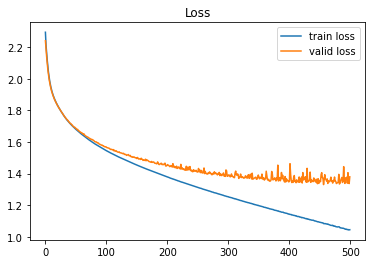

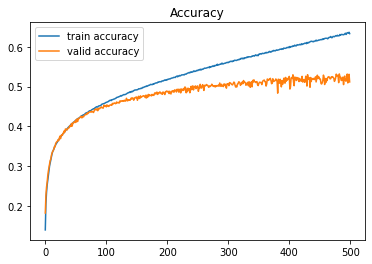

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()